In [12]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 22})

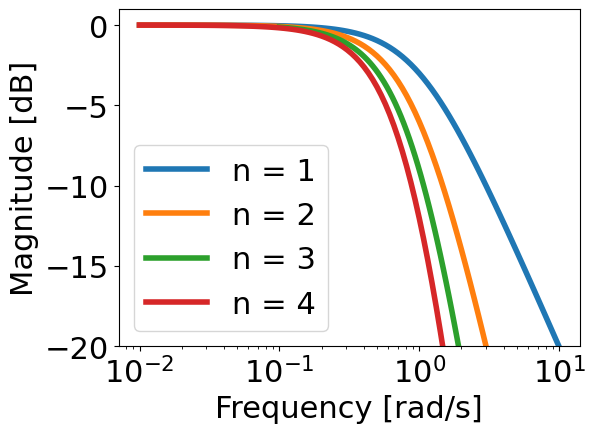

In [27]:
# Define the transfer function
w_0 = 1.0  # cutoff frequency
n_values = np.arange(1, 5)  # values of n
num, den0 = [1], [1/w_0, 1]
den = den0

fig = plt.figure()
# Create Bode plots for different values of n
for n in n_values:
    s = signal.lti(num, den)  # convolve transfer function with itself n times
    den = np.polymul(den, den0)
    w, mag, phase = signal.bode(s)

    # Plot magnitude response
    plt.semilogx(w, mag, label=f'n = {n}', linewidth=4)
    plt.xlabel('Frequency [rad/s]')
    plt.ylabel('Magnitude [dB]')

plt.ylim(-20, 1)
plt.legend(loc='lower left')
fig.tight_layout()
plt.savefig('bode_order.png', dpi=300) 
plt.show()

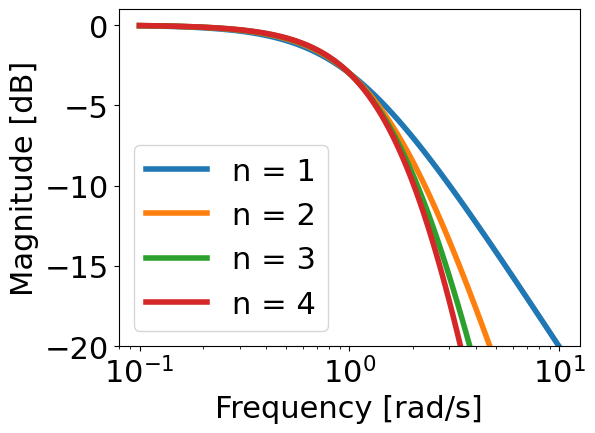

In [33]:
# Define the transfer function
w_0 = 1.0  # cutoff frequency
n_values = np.arange(1, 5)  # values of n
num, den0 = [1], [1/w_0, 1]
den = den0

fig = plt.figure()
# Create Bode plots for different values of n
for n in n_values:
    w_c = 1/np.sqrt(10**(3/(10*n)) - 1)  # cutoff frequency for the next stage
    den = [1/w_c, 1]
    for _ in range(n-1):
        den = np.polymul(den, [1/w_c, 1])
    s = signal.lti(num, den)  # convolve transfer function with itself n times
    w, mag, phase = signal.bode(s)

    # Plot magnitude response
    plt.semilogx(w, mag, label=f'n = {n}', linewidth=4)
    plt.xlabel('Frequency [rad/s]')
    plt.ylabel('Magnitude [dB]')

plt.ylim(-20, 1)
plt.legend(loc='lower left')
fig.tight_layout()
plt.savefig('bode_order_norm.png', dpi=300) 
plt.show()